Changes from v2.0 to v2.1

change sbram named cosmic_ray_veto_thresh_rate3 to cosmic_ray_veto_thresh_rate2

change sbram named cosmic_ray_core_ant_veto_rate to cosmic_ray_core_and_veto_rate

Make SBRAM address widths 5 not 6 and 1 not 2.

Add 1 delay before data output of threshold counting blocks.

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import casperfpga
import time
from lwa_f import snap2_fengine
import pandas as pd
from cr_functions import *
import struct

In [6]:
fpgfile="/home/ubuntu/kplant/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2021-09-23_1421.fpg"
brdname='snap03'

In [7]:
#load firmware and initialize etc
brd=snap2_fengine.Snap2Fengine(brdname)
brd.program(fpgfile)
brd.initialize(read_only=False)
brd.sync.arm_sync()
brd.sync.sw_sync()

2021-09-24 21:31:15,450 - lwa_f.blocks.block:snap03 - WARNING -  - hostname (10.40.0.188) couldn't be turned into integer serial
2021-09-24 21:31:15,737 - lwa_f.blocks.block:snap03 - INFO - adc - Detected FMC ADC board on port 0
2021-09-24 21:31:16,025 - lwa_f.blocks.block:snap03 - INFO - adc - Detected FMC ADC board on port 1
2021-09-24 21:31:16,039 - lwa_f.snap2_fengine:snap03 - INFO - Loading firmware /home/ubuntu/kplant/caltech-lwa/snap2_f_200msps_64i_4096c/outputs/snap2_f_200msps_64i_4096c_2021-09-23_1421.fpg to snap03


100% |########################################################################|


2021-09-24 21:36:32,324 - lwa_f.blocks.block:snap03 - WARNING -  - hostname (10.40.0.188) couldn't be turned into integer serial
2021-09-24 21:36:32,675 - lwa_f.blocks.block:snap03 - INFO - adc - Detected FMC ADC board on port 0
2021-09-24 21:36:33,023 - lwa_f.blocks.block:snap03 - INFO - adc - Detected FMC ADC board on port 1
2021-09-24 21:36:33,040 - lwa_f.snap2_fengine:snap03 - INFO - Initializing block (writable): fpga
2021-09-24 21:36:33,040 - lwa_f.snap2_fengine:snap03 - INFO - Initializing block (writable): adc
2021-09-24 21:36:33,044 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 board 0: Setting clock source to 1
2021-09-24 21:36:33,053 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 board 1: Setting clock source to 1
2021-09-24 21:36:33,061 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 1 board 0: Setting clock source to 1
2021-09-24 21:36:33,071 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 1 board 1: Setting clock source to 1
2021-09-24 21:36:43,030 - lwa_f.blocks.block

2021-09-24 21:36:56,121 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 data lane delays:
[[304, 296, 304, 296, 296, 296, 296, 296], [344, 336, 336, 320, 336, 320, 328, 336], [288, 280, 288, 288, 288, 288, 296, 296], [328, 336, 328, 320, 328, 328, 328, 328], [288, 280, 280, 280, 288, 288, 288, 288], [272, 272, 288, 272, 272, 272, 272, 272], [296, 280, 280, 288, 288, 296, 280, 280], [296, 296, 296, 296, 296, 304, 304, 288]]
2021-09-24 21:36:56,121 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 0 data lane slacks:
[[40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 40, 40], [40, 32, 40, 40, 40, 32, 32, 32], [40, 40, 32, 32, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 32, 40], [32, 32, 32, 40, 32, 32, 32, 32], [40, 40, 40, 40, 40, 32, 32, 32]]
2021-09-24 21:36:56,122 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXXX
2021-09-24 21:36:56,123 - lwa_f.blocks.block:snap03 - INF

2021-09-24 21:36:56,153 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:36:56,154 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:36:56,154 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 5:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:36:56,155 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 6:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:36:56,155 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:36:56,156 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:36:56,156 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 6, Lane 1:    XXXXXXXX

2021-09-24 21:37:07,692 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 1 data lane delays:
[[264, 264, 264, 272, 264, 256, 256, 272], [272, 264, 256, 272, 264, 280, 272, 264], [256, 256, 256, 272, 256, 264, 256, 248], [264, 280, 264, 264, 264, 272, 264, 264], [288, 288, 296, 304, 296, 288, 288, 288], [232, 232, 232, 232, 240, 232, 240, 232], [264, 248, 248, 264, 248, 248, 248, 248], [272, 272, 280, 272, 272, 272, 272, 272]]
2021-09-24 21:37:07,693 - lwa_f.blocks.block:snap03 - INFO - adc - FMC 1 data lane slacks:
[[40, 40, 40, 40, 40, 40, 40, 40], [40, 32, 40, 40, 32, 32, 40, 32], [32, 32, 32, 32, 32, 32, 40, 32], [40, 40, 40, 32, 32, 40, 40, 40], [40, 40, 40, 32, 40, 40, 40, 40], [32, 32, 32, 32, 32, 32, 32, 32], [32, 40, 40, 40, 40, 40, 40, 40], [40, 40, 40, 40, 40, 40, 40, 40]]
2021-09-24 21:37:07,694 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 0, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|----XXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:37:07,695 - lwa_f.blocks.block:snap03 - INF

2021-09-24 21:37:07,732 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 4, Lane 7:    XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX----|-----XXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:37:07,733 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 0:    XXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:37:07,734 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 1:    XXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:37:07,735 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 2:    XXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:37:07,736 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 3:    XXXXXXXXXXXXXXXXXXXXXXXXXX---|----XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:37:07,737 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 4:    XXXXXXXXXXXXXXXXXXXXXXXXXXX---|---XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
2021-09-24 21:37:07,738 - lwa_f.blocks.block:snap03 - INFO - adc - Chip 5, Lane 5:    XXXXXXXX

In [9]:
casperbrd = casperfpga.CasperFpga(brdname, transport=casperfpga.TapcpTransport)

## Work on reading and interpreting shared bram
First, I do a test similar to how I simulated the threshold excess counters.  I keep the thresholds at zero and make the data a constant for each antenna.  All antennas except 0 should exceed threshold on every clock cycle and antenna 0 should never exceed threshold.  Thus, all counts should be 2^28 because that is the number of clock cycles between reset pulses.

In [11]:
setup_data_source(casperbrd,"constant")

Data source set to constant


The shared BRAMS I want to read are:
    
'cosmic_ray_veto_thresh_rate1'

'cosmic_ray_veto_thresh_rate3'  This should be 2 not 3, but I made a typo and in the firmware it's called 3.

'cosmic_ray_thresh_rate1'

'cosmic_ray_thresh_rate2'

'cosmic_ray_core_ant_veto_rate'   This should be cosmic_ray_core_and_veto_rate.

In [10]:
casperbrd.listdev()

['aaa_onegbe_one_GbE',
 'adc_sync',
 'ads5296_controller0_0',
 'ads5296_controller0_1',
 'ads5296_controller1_0',
 'ads5296_controller1_1',
 'ads5296_hardware_rst0',
 'ads5296_hardware_rst1',
 'ads5296_spi_controller0',
 'ads5296_spi_controller1',
 'ads5296_wb_ram0_0_0',
 'ads5296_wb_ram0_0_1',
 'ads5296_wb_ram0_0_2',
 'ads5296_wb_ram0_0_3',
 'ads5296_wb_ram0_1_0',
 'ads5296_wb_ram0_1_1',
 'ads5296_wb_ram0_1_2',
 'ads5296_wb_ram0_1_3',
 'ads5296_wb_ram1_0_0',
 'ads5296_wb_ram1_0_1',
 'ads5296_wb_ram1_0_2',
 'ads5296_wb_ram1_0_3',
 'ads5296_wb_ram1_1_0',
 'ads5296_wb_ram1_1_1',
 'ads5296_wb_ram1_1_2',
 'ads5296_wb_ram1_1_3',
 'autocorr_acc_cnt',
 'autocorr_acc_len',
 'autocorr_common_dout0_bram',
 'autocorr_common_dout1_bram',
 'autocorr_common_dout2_bram',
 'autocorr_common_dout3_bram',
 'autocorr_common_dout4_bram',
 'autocorr_common_dout5_bram',
 'autocorr_common_dout6_bram',
 'autocorr_common_dout7_bram',
 'autocorr_mux_sel',
 'autocorr_trig',
 'chan_reorder_dynamic_map1',
 'corr_0_

In [69]:
data = casperbrd.read("cosmic_ray_thresh_rate2",259)


I expected to only be able to read 4*32 = 128 bytes from this register, but I can read up to 259 wihout getting an error message. Although the length of the bytes object is 256.

Checking the simulink design, I made the address width 6 when it should have been 5.  So there should be 256 bytes, the last half of which are empty.

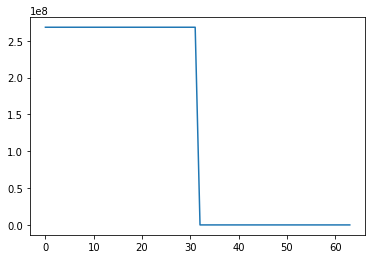

In [70]:
values=struct.unpack('>64l',casperbrd.read("cosmic_ray_thresh_rate2",64*4,0))
plt.plot(values)

In [67]:
#the following also works for unpacking
#data = casperbrd.read("cosmic_ray_thresh_rate2",259)
#byteslength=256
#values=np.ones(int(byteslength/4))
#for i in range(int(byteslength/4)):
#    values[i] = int.from_bytes(data[4*i:(4*i)+4],'big')

In [72]:
print(values[0])
print(values[30])
print(values[31])
print(values[32])

268435455
268435455
268435455
0


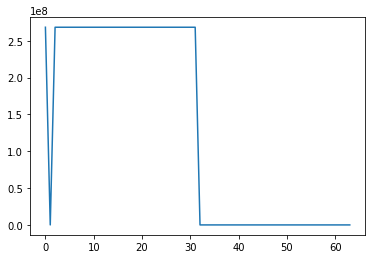

In [74]:
values=struct.unpack('>64l',casperbrd.read("cosmic_ray_thresh_rate1",64*4,0))
plt.plot(values)

268435455
0
268435455
268435455
268435455
268435455
0


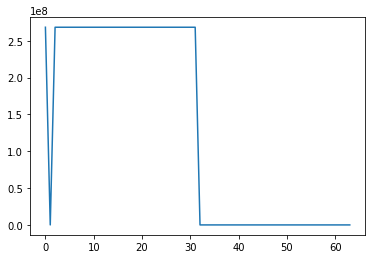

In [83]:
values=struct.unpack('>64l',casperbrd.read("cosmic_ray_veto_thresh_rate1",64*4,0))
plt.plot(values)
print(values[0])
print(values[1])
print(values[2])
print(values[3])
print(values[30])
print(values[31])
print(values[32])

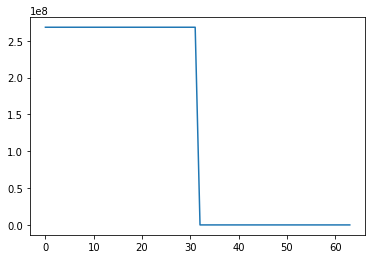

In [86]:
values=struct.unpack('>64l',casperbrd.read("cosmic_ray_veto_thresh_rate3",64*4,0))
plt.plot(values)

The two pairs of BRAMs each have only one antenna with 0 counts (others are 268435455=2^28 -1). This is good but it's weird that the zero is what I read as antenna 1 not antenna 0.

In [92]:
def read_threshold_rates(casperbrd):
    #Reads the shared BRAMs that hold the number of times the individual antennas exceed thresholds in the last 2^28 clock cycles
    #Returns an array of length 64 for the rate each antenna exceeds the core threshold and another for the rate exceeding veto threshold
    #casperbrd is a casperfpga CasperFpga object
    core = np.zeros(64)
    veto = np.zeros(64)
    core[:32]= struct.unpack('>32l',casperbrd.read("cosmic_ray_thresh_rate1",32*4,0))
    core[32:]= struct.unpack('>32l',casperbrd.read("cosmic_ray_thresh_rate2",32*4,0))
    veto[:32]= struct.unpack('>32l',casperbrd.read("cosmic_ray_veto_thresh_rate1",32*4,0))
    veto[32:]= struct.unpack('>32l',casperbrd.read("cosmic_ray_veto_thresh_rate3",32*4,0))
    return core, veto

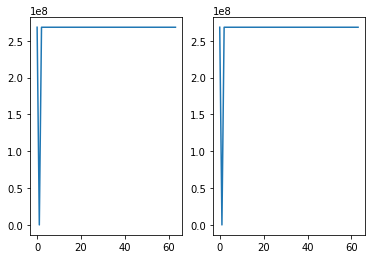

In [96]:
core,veto = read_threshold_rates(casperbrd)
plt.subplot(121)
plt.plot(core)
plt.subplot(122)
plt.plot(veto)

## Check antenna mapping
With the test signal as a constant for each antenna, I set different thresholds to confirm antenna ordering in the SBRAMs.  For example, if the threshold is 25=5^2 then antennas less than and equal to 5 should never exceed the threshold.  The ordering is as desired except that it seems to be off by one in each BRAM, such that the 64 numbers in the array correspond to antennas [31,0,1,2,...30,63,32,33,34,...62].

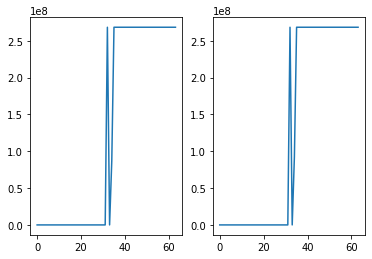

In [124]:
setvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx",33**2)
setvalue(casperbrd,"veto_power_thresh","cr_registers.xlsx",33**2)

getvalue(casperbrd,"trigger_power_thresh","cr_registers.xlsx")
time.sleep(2)  #have to wait for it to update
core,veto = read_threshold_rates(casperbrd)
plt.subplot(121)
plt.plot(core)
plt.subplot(122)
plt.plot(veto)


In [ ]:
+
-++++++++++++++++++++++++++++++++++-++++++++++++++++++++++++++++++-------------------------------------------------**--*+-----------

9-

-++++++++++++++++
9++++++++++++++++++




-
++++++++++++++++++++++++++++++++++++++++++++
9+++++++++++++++++++++++++++++++++++++++++---*-*-+--**--9----*-----*------------------***----------------------------------------*--+--**-*--------------------------------9*----***--*/oo-------9-9-----------------*//9//***-9//88k9/k9/98*+++++++++++++++




9699
9666969









696
696636






6










+
























6








